In [104]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Setting the main path for the dataset
data_dir = 'skin_diseases'

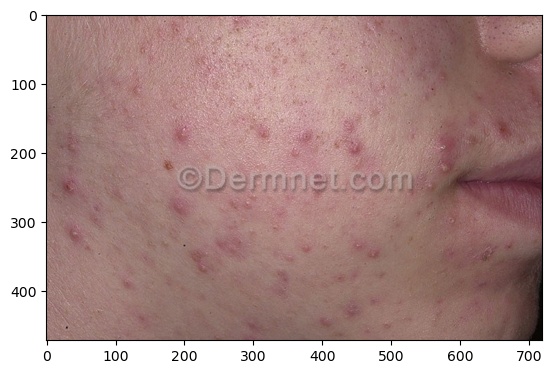

In [ ]:
# Plotting an example image from the dataset
img_example = cv2.imread(os.path.join(data_dir, 'train', 'Acne', '07Acne081101.jpeg'))
plt.imshow(cv2.cvtColor(img_example, cv2.COLOR_BGR2RGB))

In [ ]:
# Loading both training and testing datasets using Keras utility
train_data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'train'))
test_data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'test'))

Found 13898 files belonging to 22 classes.
Found 1546 files belonging to 22 classes.


In [6]:
# Create a data iterator for the training dataset which allows us to access our data by iterating over the dataset
data_iterator = train_data.as_numpy_iterator()

In [ ]:
# Get consecutive batches of data from the iterator
batch = data_iterator.next()
# Show the batch images with labels represented as numpy arrays
batch

(array([[[[161.82422   , 117.82422   , 116.82422   ],
          [142.75146   ,  91.48291   ,  96.33594   ],
          [162.89014   , 110.95264   , 118.42139   ],
          ...,
          [157.95166   , 114.95166   ,  98.95166   ],
          [149.83496   , 107.83496   ,  91.83496   ],
          [164.63281   , 123.25049   , 106.01514   ]],
 
         [[151.2539    , 107.92285   , 108.92285   ],
          [147.0459    ,  96.6084    , 102.76465   ],
          [183.2793    , 132.42041   , 141.42041   ],
          ...,
          [147.04443   , 104.04443   ,  88.04443   ],
          [148.66748   , 106.66748   ,  92.66748   ],
          [154.27637   , 112.27637   ,  98.62012   ]],
 
         [[153.8877    , 112.27344   , 114.08057   ],
          [169.55713   , 121.40088   , 126.55713   ],
          [169.68848   , 119.86279   , 128.80469   ],
          ...,
          [167.66113   , 123.66113   , 110.66113   ],
          [149.62842   , 107.59766   ,  95.68994   ],
          [158.4624    , 115.54

In [ ]:
# An example of accessing a single test label from the batch
batch[1]

array([18, 17,  6,  2, 11, 11,  6,  2,  1, 19,  0, 17, 11,  3, 18,  1,  8,
        8,  1, 13,  2, 14,  3, 16,  2, 21, 14,  8,  5,  7,  5,  3])

In [ ]:
# Array of class names from the training dataset
class_names = train_data.class_names
class_names

['Acne',
 'Actinic_Keratosis',
 'Benign_tumors',
 'Bullous',
 'Candidiasis',
 'DrugEruption',
 'Eczema',
 'Infestations_Bites',
 'Lichen',
 'Lupus',
 'Moles',
 'Psoriasis',
 'Rosacea',
 'Seborrh_Keratoses',
 'SkinCancer',
 'Sun_Sunlight_Damage',
 'Tinea',
 'Unknown_Normal',
 'Vascular_Tumors',
 'Vasculitis',
 'Vitiligo',
 'Warts']

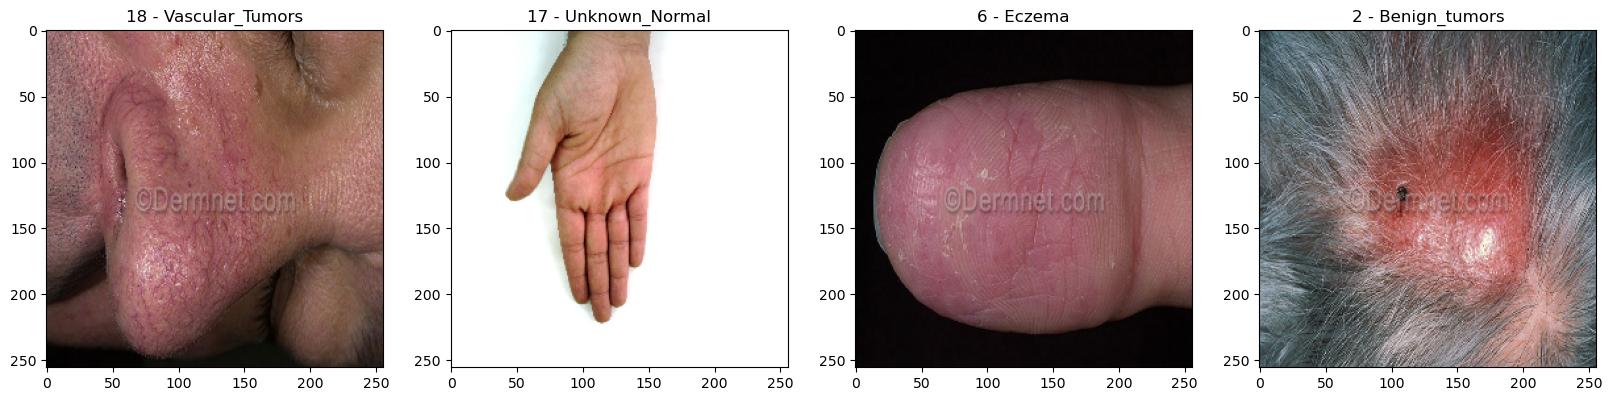

In [ ]:
# Plotting the first four images from the batch with their corresponding labels
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(f'{batch[1][idx]} - {class_names[batch[1][idx]]}')

In [12]:
# 32 Images of 256 x 256 pixels with 3 RGB channels per batch
batch[0].shape

(32, 256, 256, 3)

In [13]:
# 32 Labels per batch (one for each image)
batch[1].shape

(32,)

In [14]:
''' DEEP LEARNING MODEL ARCHITECTURE'''

' DEEP LEARNING MODEL ARCHITECTURE'

In [16]:
# MODEL ARCHITECTURE

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(256, 256, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(22, activation='softmax'))


c:\Users\hughm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Data augmentation and preprocessing

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

# Adding class weights to handle class imbalance
y_train = train_generator.classes
class_names = list(train_generator.class_indices.keys())

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format required by Keras
class_weight_dict = dict(enumerate(class_weights))



Found 13898 images belonging to 22 classes.
Found 1546 images belonging to 22 classes.


In [ ]:
# Setting loss function, optimizer, and number of epochs
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
num_epochs = 200

In [ ]:
# Compiling the model with the specified optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Displaying the model summary to check the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 1,976,438 (7.54 MB)

 Trainable params: 1,974,422 (7.53 MB)

 Non-trainable params: 2,016 (7.88 KB)

In [ ]:
# Setting up TensorBoard for logging
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Fitting the model to the training data with validation and class weights
hist = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator, 
    class_weight=class_weight_dict,
    callbacks=[tensorboard_callback]
    )

Epoch 1/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.7243 - loss: 0.9827 - val_accuracy: 0.5595 - val_loss: 1.7753
Epoch 2/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 397s 904ms/step - accuracy: 0.7376 - loss: 0.9402 - val_accuracy: 0.4690 - val_loss: 2.2345
Epoch 3/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 392s 895ms/step - accuracy: 0.7248 - loss: 0.9696 - val_accuracy: 0.4948 - val_loss: 2.0421
Epoch 4/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 392s 892ms/step - accuracy: 0.7449 - loss: 0.9054 - val_accuracy: 0.4942 - val_loss: 2.0914
Epoch 5/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 392s 893ms/step - accuracy: 0.7467 - loss: 0.9125 - val_accuracy: 0.5298 - val_loss: 1.9678
Epoch 6/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 393s 894ms/step - accuracy: 0.7391 - loss: 0.9241 - val_accuracy: 0.5433 - val_loss: 1.8881
Epoch 7/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 395s 901ms/step - accuracy: 0.7544 - loss: 0.9005 - val_accuracy: 0.5388 - val_loss: 1.8839
Epoch 8/200
435/435 ━━━━━━━━━━━━━━━━━━━━ 392s 894ms/step - accuracy: 0.7

In [ ]:
# Accessing the training history to analyze performance
hist.history

{'accuracy': [0.723269522190094,
  0.7328392863273621,
  0.7214707136154175,
  0.7357892990112305,
  0.7432724237442017,
  0.7406821250915527,
  0.7492445111274719,
  0.7518348097801208,
  0.7542811632156372,
  0.7569434642791748,
  0.7544970512390137,
  0.7609008550643921,
  0.7623398900032043,
  0.7661533951759338,
  0.7673766016960144,
  0.7749316692352295,
  0.7754353284835815,
  0.7826306223869324,
  0.7763707041740417,
  0.7783854007720947,
  0.784861147403717,
  0.7889624238014221,
  0.7919844388961792,
  0.7932795882225037,
  0.7863721251487732,
  0.8005468249320984,
  0.8028493523597717,
  0.8055835366249084,
  0.8014822006225586,
  0.8070225715637207,
  0.8029212951660156,
  0.8115556240081787,
  0.8196143507957458,
  0.8150812983512878,
  0.8199741244316101,
  0.815009355545044,
  0.8270254731178284,
  0.8219168186187744,
  0.8279608488082886,
  0.8306950926780701,
  0.8274571895599365,
  0.8333573341369629,
  0.8311987519264221,
  0.8372427821159363,
  0.8411282300949097,
 

<function matplotlib.pyplot.show(close=None, block=None)>

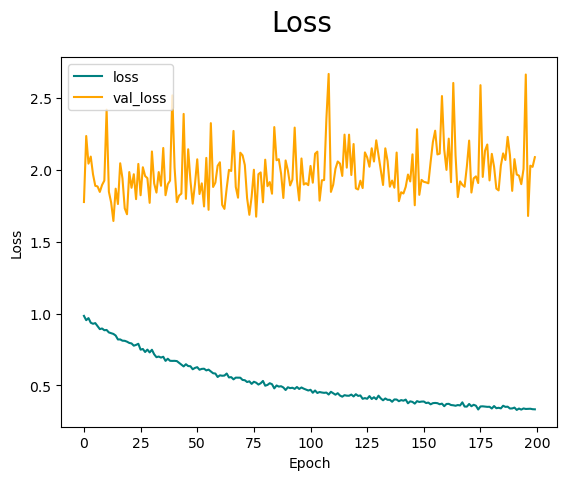

In [ ]:
# Plotting the training and validation loss over epochs
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

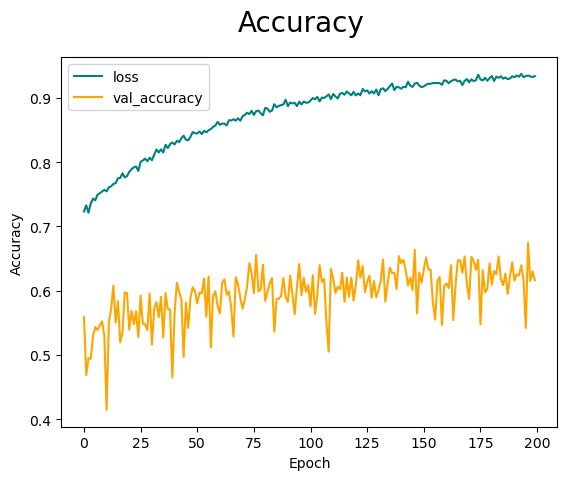

In [ ]:
# Plotting the training and validation loss over epochs
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show

In [ ]:
# Save the model in Keras format
model.save('my_model.keras')

In [140]:
def get_single_img(index=0):
    test_img_batch = val_generator[0][0]
    test_labels_batch = val_generator[0][1]
    single_test_label = test_labels_batch[index]
    single_test_label = test_labels_batch[index].astype(int)
    single_test_img = test_img_batch[index]
    single_test_img = tf.expand_dims(single_test_img, axis=0)
    single_test_img.shape
    return single_test_img, single_test_label


In [142]:
def predict_skin_disease(image, _label):
    # Predicting the skin disease using the trained model
    test_preds = model.predict(image)
    idx_pred = np.argmax(test_preds)
    # Plot the prediction percentages
    fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
    ax[0].bar(class_names, test_preds[0])
    ax[0].title.set_text(f'Predicted: {class_names[idx_pred]} ({idx_pred}) - Confidence: {test_preds[0][idx_pred]*100:.2f}%')
    ax[0].set_xticklabels(class_names, rotation=90)
    ax[0].set_xlabel('Skin Disease Classes')
    ax[0].set_ylabel('Prediction Probability')
    # Show the image
    ax[1].imshow(image[0])
    ax[1].axis('off')
    # Show correct label if available
    if _label is not None:
        ax[1].title.set_text(f'Correct: {class_names[_label]} ({_label})')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


C:\Users\hughm\AppData\Local\Temp\ipykernel_19952\2058966797.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(class_names, rotation=90)


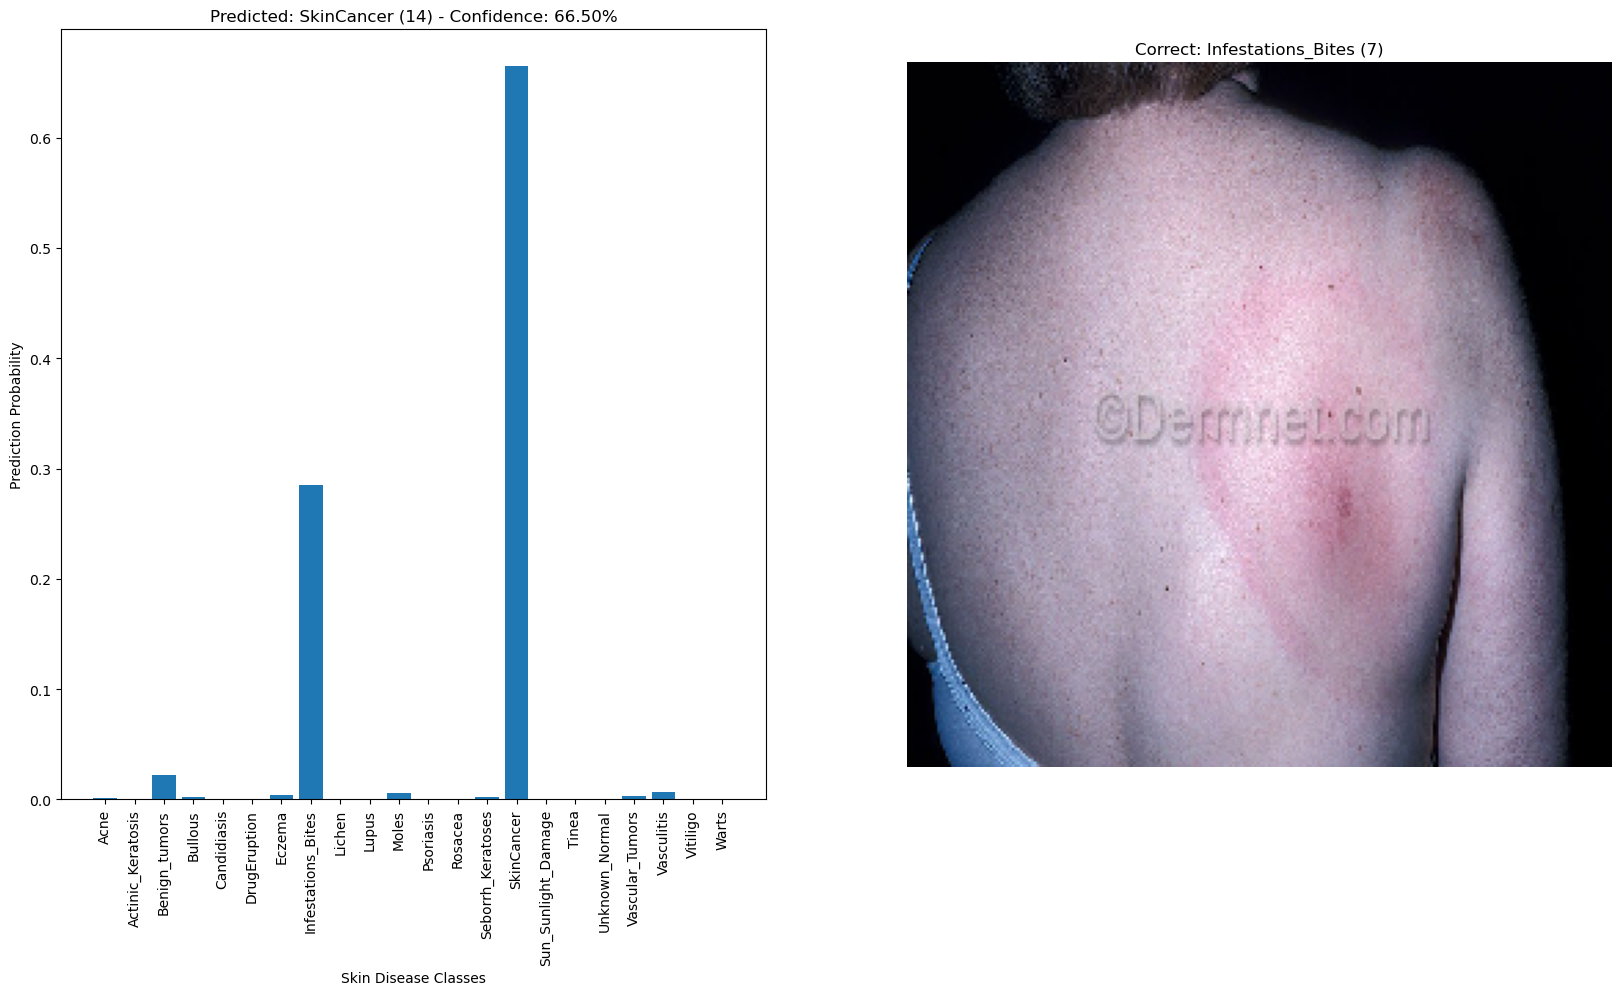

In [146]:
# Getting single image from validation set (#1) and predicting skin disease
single_test_img, single_test_label = get_single_img(1)
predict_skin_disease(single_test_img, single_test_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


C:\Users\hughm\AppData\Local\Temp\ipykernel_19952\2058966797.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(class_names, rotation=90)


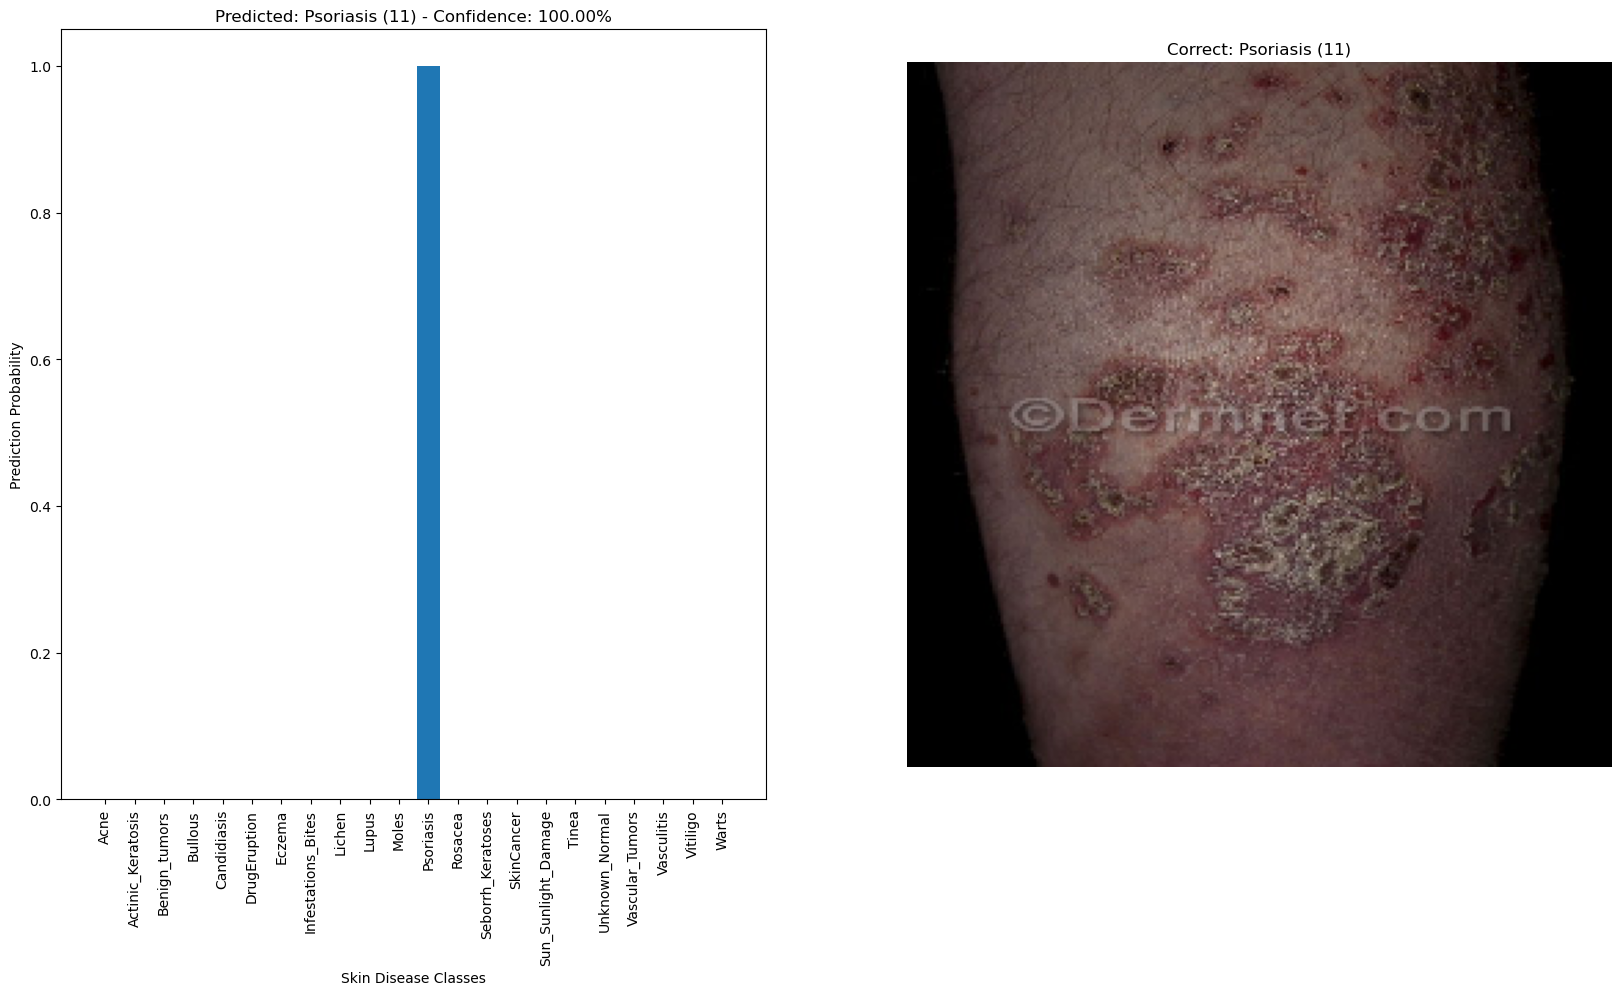

In [144]:
# Getting single image from validation set (#2) and predicting skin disease
single_test_img, single_test_label = get_single_img(2)
predict_skin_disease(single_test_img, single_test_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\hughm\AppData\Local\Temp\ipykernel_19952\2058966797.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(class_names, rotation=90)


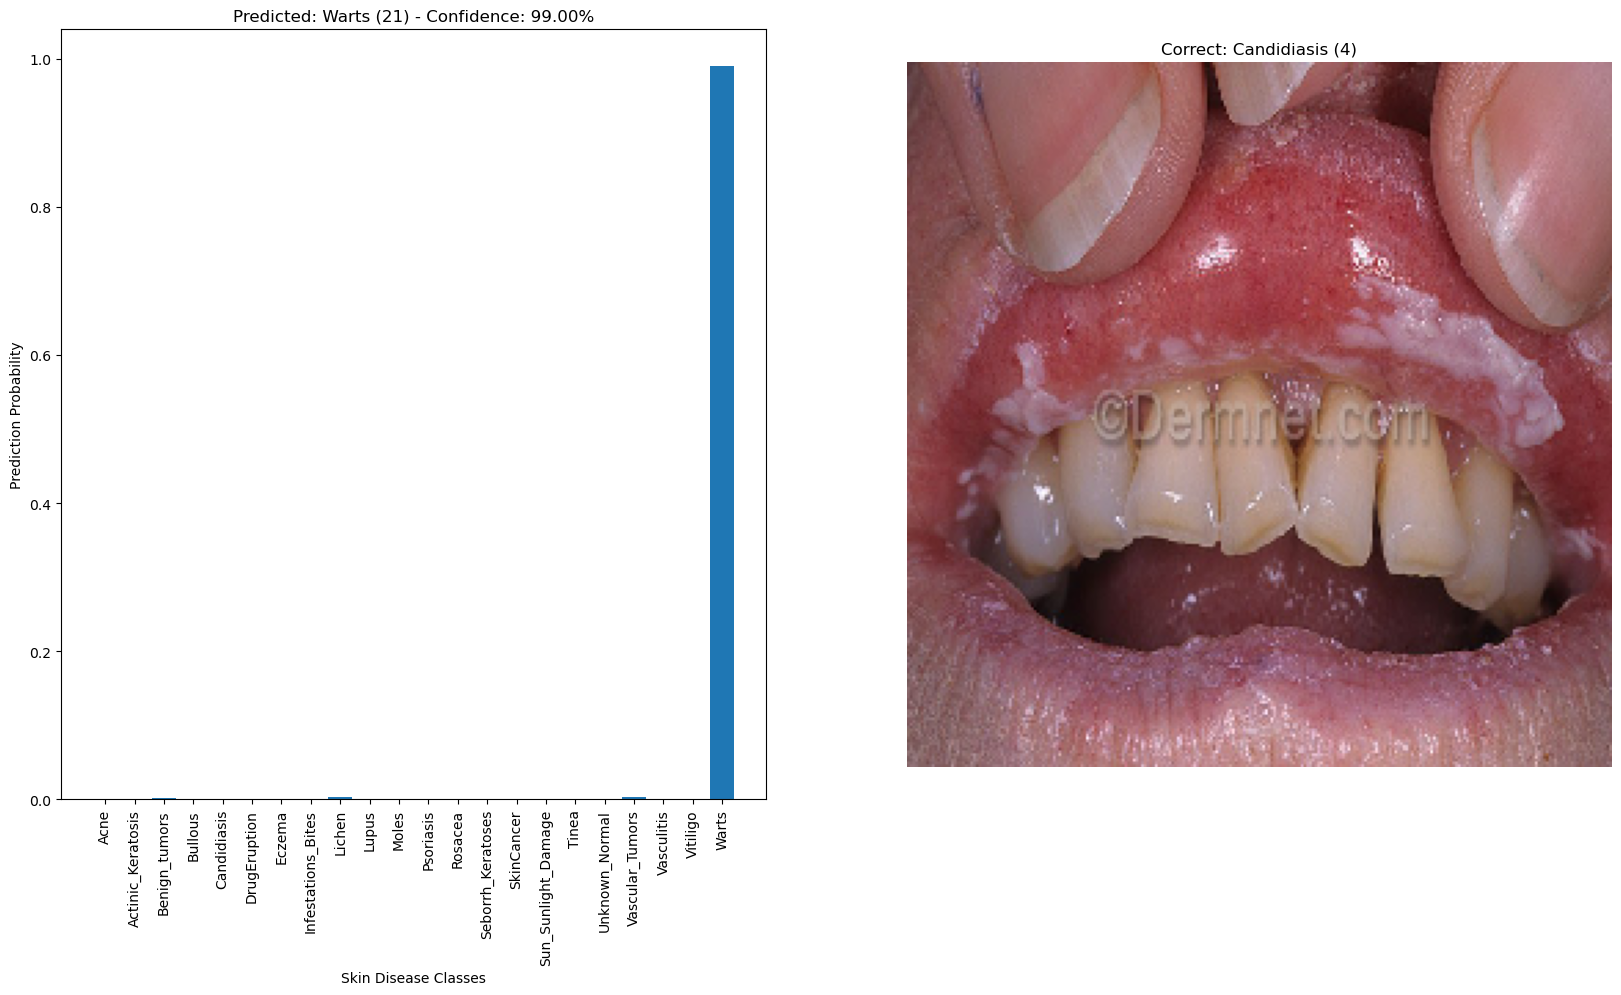

In [ ]:
# Getting single image from validation set (#3) and predicting skin disease
single_test_img, single_test_label = get_single_img(3)
predict_skin_disease(single_test_img, single_test_label)